In [23]:
import pymongo as pm
import pandas as pd
import json
from IPython.display import clear_output

## Connect to MongoDB

In [12]:
# set vars 
auth = pd.read_csv('auth.txt', header = None) # this auth.txt file contains the password for the sketchloop user
pswd = auth.values[0][0]
user = 'sketchloop'
host = 'cogtoolslab.org' ## cocolab ip address

conn = pm.MongoClient('mongodb://sketchloop:' + pswd + '@127.0.0.1')
db = conn['stimuli']
coll = db['semantic_parts_graphical_conventions']

## Read in csv file and insert into database

In [13]:
file_path = 'graphical_conventions_group_data_run5_submitButton_with_TargetURL.csv'
x = pd.read_csv(file_path)

x = x.drop(['png'], axis=1)

## convert to json
y = x.to_json(orient='records')
z = json.loads(y)

In [14]:
## loop through list of records and insert each into collection
reallyRun = 1
if reallyRun:
    for i,_z in enumerate(z):
        coll.insert_one(_z)
        print('Inserted {} records.'.format(i))
        clear_output(wait=True)
else:
    print('Did not insert any new data.')

Inserted 2599 records.


## inspect & validate collection (to make sure records look right)¶

In [17]:
print('There are {} records in this collection.'.format(coll.count()))

There are 2600 records in this collection.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  """Entry point for launching an IPython kernel.


In [18]:
z[0]

{'Unnamed: 0': 0,
 'gameID': '4071-d4fa2274-0805-41c8-8ebc-819ddc2b5c56',
 'trialNum': 1,
 'condition': 'control',
 'target': 'waiting_01',
 'category': 'waiting',
 'repetition': 0,
 'phase': 'pre',
 'generalization': 'between',
 'drawDuration': 13.586,
 'outcome': True,
 'response': 'waiting_01',
 'numStrokes': 6.0,
 'meanPixelIntensity': 0.0303,
 'numCurvesPerSketch': 15.0,
 'numCurvesPerStroke': 2.5,
 'timedOut': False,
 'svgString': "[u'M94,107c0,-2.90836 -3.18308,-6.36617 -4,-8c-1.38042,-2.76085 0,-9.95701 0,-13c0,-24.1259 10.50002,-29.87501 31,-35c9.91797,-2.47949 24.79375,-1.47083 33,4c2.07975,1.3865 22.26453,30.73547 18,35c-9.87976,9.87976 -32.94194,5.70646 -44,14c-7.44641,5.58481 -22.46578,11 -31,11', u'M98,114c0,8.6585 28.51173,84.51173 34,90', u'M170,93c0,29.71717 33,65.95957 33,95', u'M106,153c0,14.46132 -8,27.1461 -8,42', u'M112,151c0,-6.62515 59.36688,-36 66,-36', u'M110,155c9.47907,0 10.28634,15.23789 20,12c5.71058,-1.90353 51.17712,-24.17712 55,-28c1.80221,-1.80221 -1.1

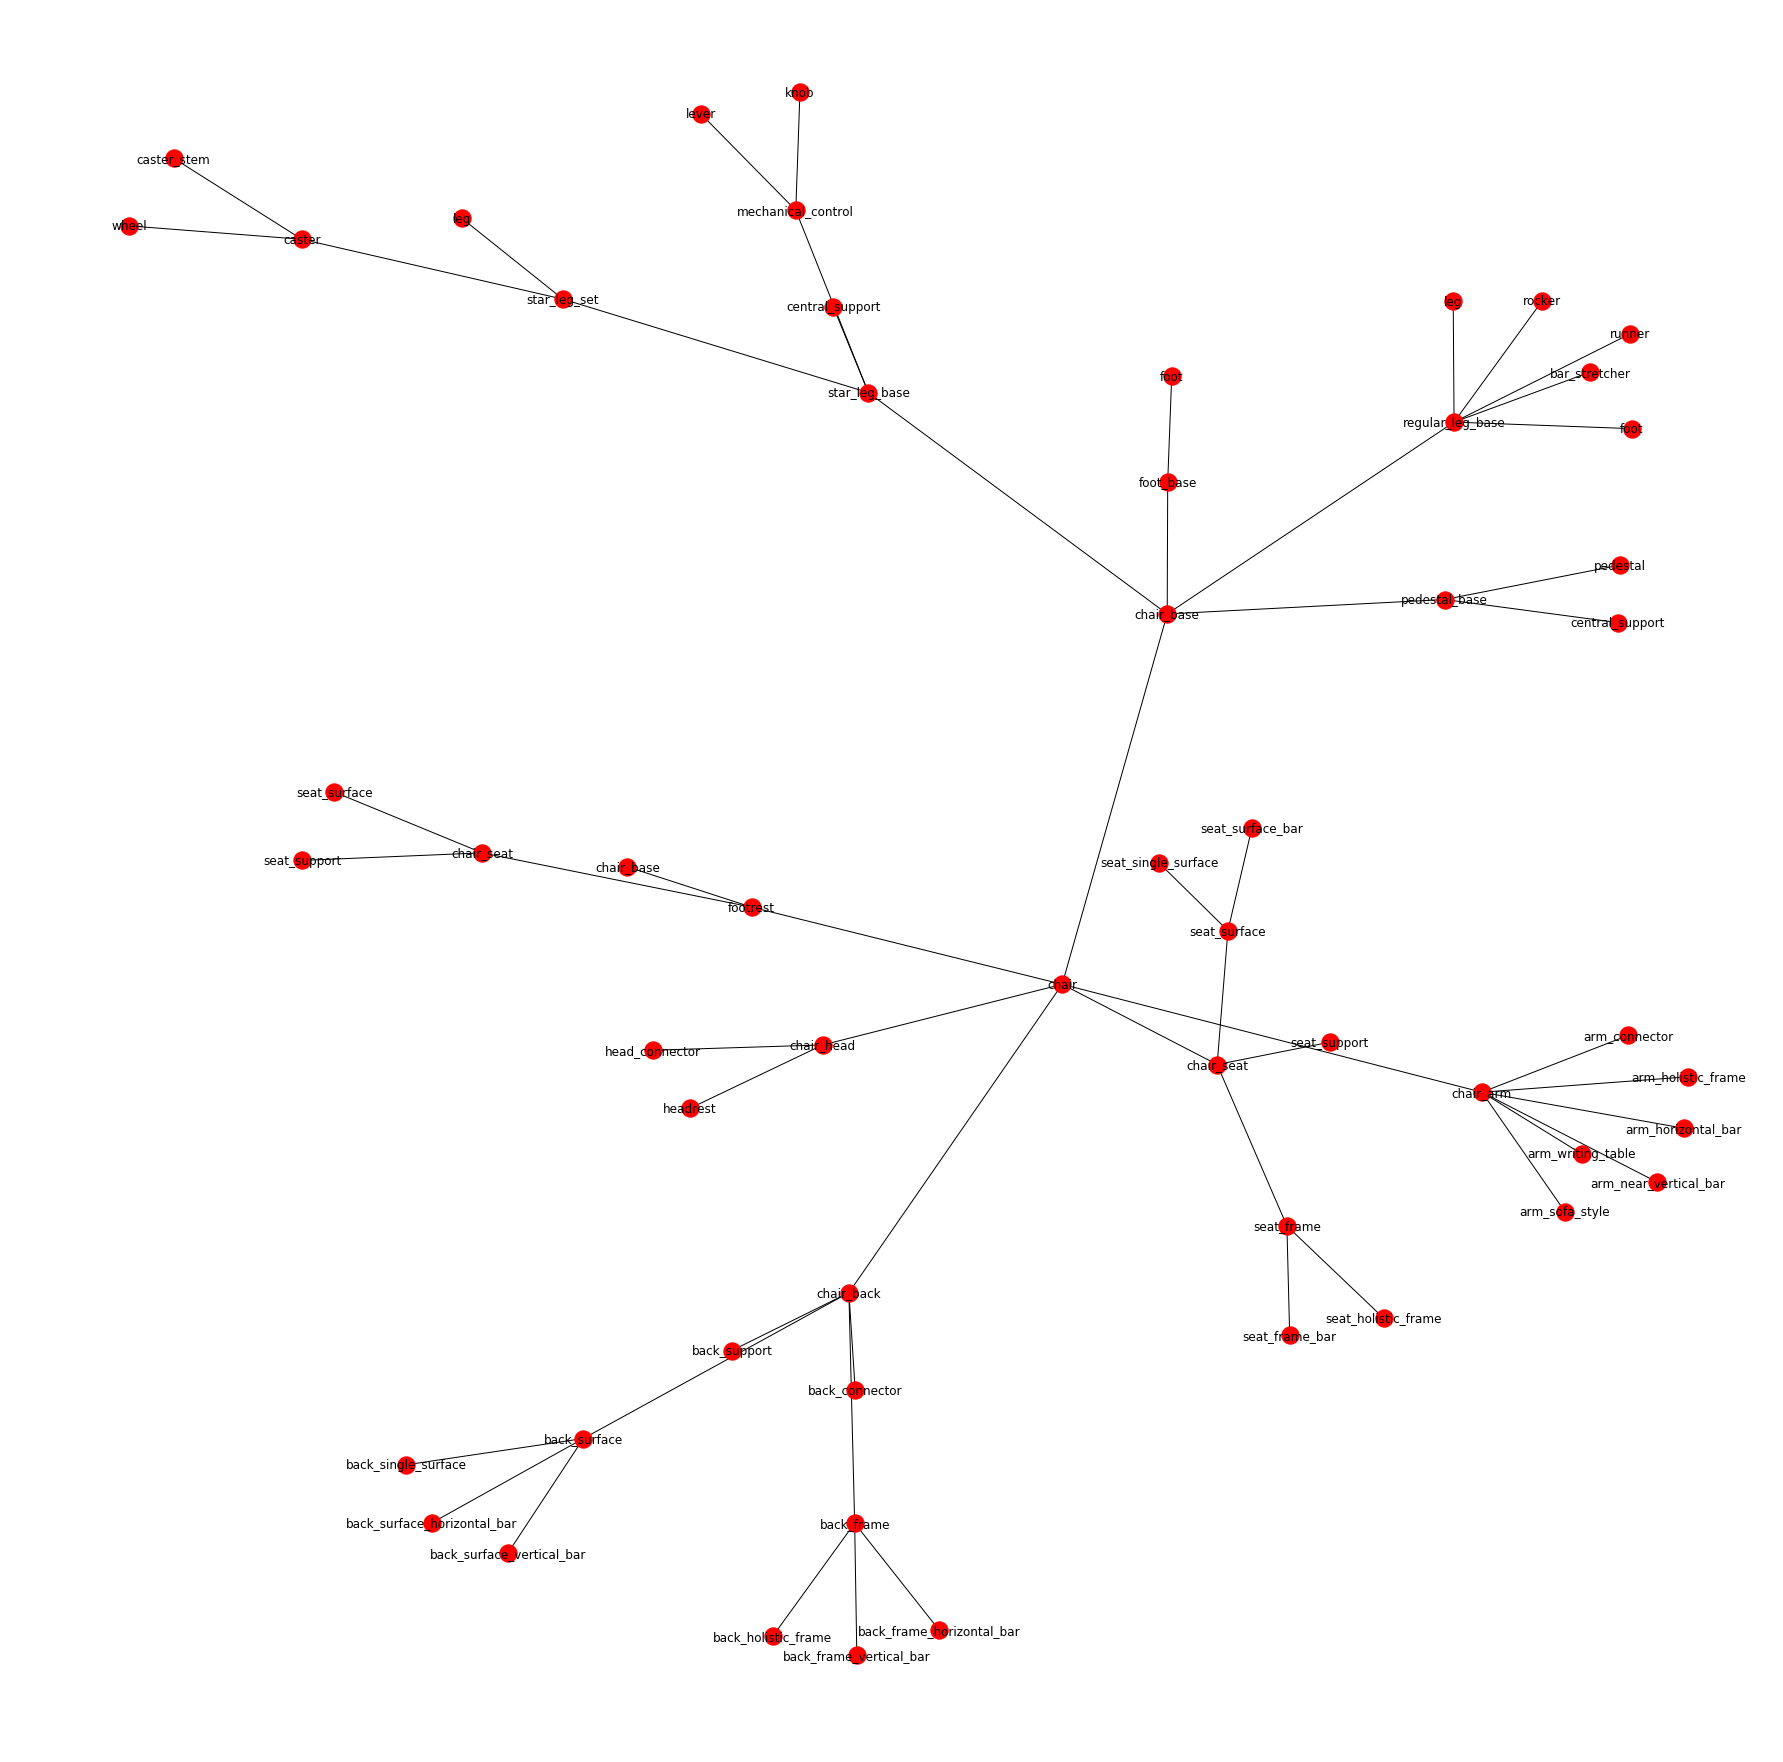

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout

f = plt.figure(figsize = ((24,24)))
G = nx.Graph()
f = open("Chair.txt", "r")

edges = set()

mapping = {}
for line in f:
    path = line.split(' ')[1]
    edge = path.split('/')
    
    for i in range (0 ,len (edge)-1):
        one = '/'.join(edge[:i+1])
        two = '/'.join(edge[:i+2])
        edges.add((one,two))
        mapping[one] = one.split('/')[-1]
        mapping[two] = two.split('/')[-1]
    
for i, j in edges:
    G.add_edge(i,j)


nx.draw(G,labels = mapping)

plt.show()